In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d

In [25]:
def func_Omega1(t):
    temp = []
    for i in range(len(t)):
        if t[i] < Trabi:
            temp.append(Omega*np.sqrt(t[i]/Trabi))
        else:
            temp.append(Omega)
    return np.array(temp)

def func_Omega2(t):
    temp = []
    for i in range(len(t)):
        if t[i] < Trabi:
            temp.append(Omega*t[i]/Trabi)
        else:
            temp.append(Omega)
    return np.array(temp)

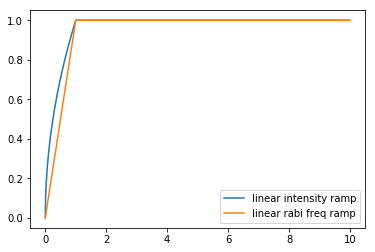

In [28]:
t = np.arange(0,10,0.01)
Omega = 1
Trabi = 1
Omega_list1 = func_Omega(t)
# Omega_list2 = func_Omega2(t)

plt.plot(t,Omega_list1,label = 'linear intensity ramp')
plt.plot(t,Omega_list2, label = 'linear rabi freq ramp')
plt.legend()

In [42]:
data0 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_13_23/Overlap2023_01_13_16_41_31_L8_1',delimiter=',')
z0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_13_23/z_2023_01_13_16_41_31_L8_1',delimiter=',')
zz0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_13_23/zz_2023_01_13_16_41_31_L8_1',delimiter=',')
data1 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_13_23/Overlap2023_01_13_16_39_06_L8_1',delimiter=',')
z1= np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_13_23/z_2023_01_13_16_39_06_L8_1',delimiter=',')
zz1= np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_13_23/zz_2023_01_13_16_39_06_L8_1',delimiter=',')

In [45]:
zz0[:,0:8]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ],
       [ 1.        ,  0.99438761,  0.99439465,  0.99439487,  0.99439489,
         0.99439487,  0.99439465,  0.99438761],
       [ 1.        ,  0.97902719,  0.97911972,  0.97912845,  0.9791293 ,
         0.97912845,  0.97911972,  0.97902719],
       [ 1.        ,  0.97946067,  0.97953752,  0.97954741,  0.97954841,
         0.97954741,  0.97953752,  0.97946067],
       [ 1.        ,  0.98950358,  0.98951827,  0.98951813,  0.98951811,
         0.98951813,  0.98951827,  0.98950358],
       [ 1.        ,  0.97417281,  0.97431878,  0.97432157,  0.97432189,
         0.97432157,  0.97431878,  0.97417281],
       [ 1.        ,  0.95353812,  0.95396931,  0.95401083,  0.95401476,
         0.95401083,  0.95396931,  0.95353812],
       [ 1.        ,  0.96583854,  0.96605007,  0.96605914,  0.96605991,
         0.96605914,  0.96605007,  0.96583854],
       [ 1.        ,  0.97486319

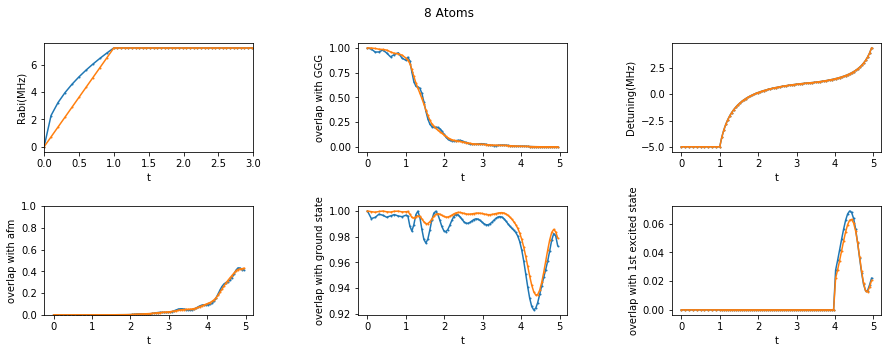

In [34]:
fig, ax = plt.subplots(2, 3, figsize=(15,5))
fig.suptitle('8 Atoms')
#op_list1 = ['t','Detuning','rabi','overlap_g','overlap_afm','overlap_0','overlap_1','overlap_2','overlap_3']
MS = 1
LS = '-'
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,2].plot(data0[0],data0[1],marker='o',markersize=MS,ls=LS)
ax[0,2].set_xlabel('t')
ax[0,2].set_ylabel('Detuning(MHz)')
ax[0,0].plot(data0[0],data0[2],marker='o',markersize=MS,ls=LS)
ax[0,0].set_xlabel('t')
ax[0,0].set_xlim([0,3])
ax[0,0].set_ylabel('Rabi(MHz)')
ax[0,1].plot(data0[0],data0[3],marker='o',markersize=MS,ls=LS)
ax[0,1].set_xlabel('t')
ax[0,1].set_ylabel('overlap with GGG')
ax[1,0].plot(data0[0],data0[4],marker='o',markersize=MS,ls=LS)
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel('t')
ax[1,0].set_ylabel('overlap with afm')

ax[1,1].plot(data0[0],data0[5],marker='o',markersize=MS,ls=LS)
ax[1,1].set_xlabel('t')
ax[1,1].set_ylabel('overlap with ground state')

ax[1,2].plot(data0[0],data0[7],marker='o',markersize=MS,ls=LS)
ax[1,2].set_xlabel('t')
ax[1,2].set_ylabel('overlap with 1st excited state')



ax[0,2].plot(data1[0],data1[1],marker='o',markersize=MS,ls=LS)

ax[0,0].plot(data1[0],data1[2],marker='o',markersize=MS,ls=LS)

ax[0,1].plot(data1[0],data1[3],marker='o',markersize=MS,ls=LS)

ax[1,0].plot(data1[0],data1[4],marker='o',markersize=MS,ls=LS)

ax[1,1].plot(data1[0],data1[5],marker='o',markersize=MS,ls=LS)

ax[1,2].plot(data1[0],data1[7],marker='o',markersize=MS,ls=LS)


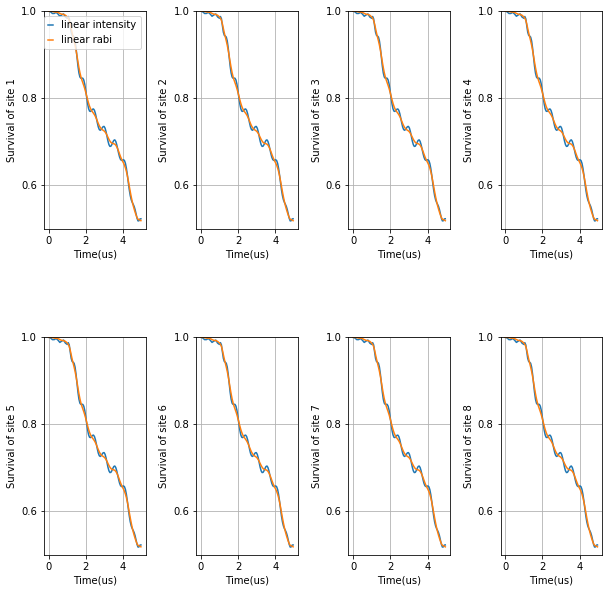

In [41]:
N = 8

fig,ax = plt.subplots(ncols = 4 ,nrows=2,figsize=(10,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0

for i in range(N):
    n0 = 1-(z0[:,i]+1)/2
    n1 = 1-(z1[:,i]+1)/2

    #ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data0[0],n0,label='linear intensity')
    ax[i//4,i%4].plot(data1[0],n1,label='linear rabi')
    ax[i//4,i%4].set_ylim([0.5,1])
    ax[i//4,i%4].set_yticks([0.6,0.8,1])
    #standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1))
ax[0,0].legend(handlelength=0.5)
plt.show()
#print((standard_deviation**0.5)/N)

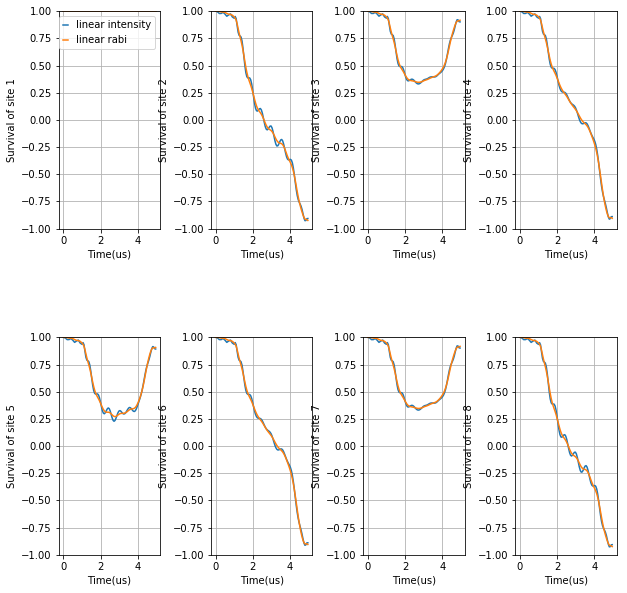

In [50]:
N = 8

fig,ax = plt.subplots(ncols = 4 ,nrows=2,figsize=(10,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0

for i in range(N):
    #ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data0[0],zz0[:,i],label='linear intensity')
    ax[i//4,i%4].plot(data1[0],zz1[:,i],label='linear rabi')
    ax[i//4,i%4].set_ylim([-1,1])
    #standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1))
ax[0,0].legend(handlelength=0.5)
plt.show()
#print((standard_deviation**0.5)/N)


